## <div style="text-align: right"> Mayank Pathak </div>
# Problem Set 2
## Question 2 
### Classifying Fashion MNIST Dataset 

### October 08, 2018

- 1. **Introduction** 
    - 1.1 Importing Necessary libraries
    - 1.2 Defining Hyper-Parameters
- 2. **Data Preparation**
    - 2.1  Load Data
    - 2.2  Reshaping Input Images
    - 2.3  Normalize Images 
    - 2.4  Show Sample Training Images and Labels
- 3. **Neural Network**
    - 3.1 Define Activation Function 
    - 3.2 Define the Model
    - 3.3 Set the optimizer
    - 3.4 Fit the Training Data
- 4. **Evaluate Model**
    - 4.1 Evaluate the metwork with test data
    - 4.2 Plot Accuracy and Loss curves
    - 4.3 Plot Confusion Matrix

### 1. Introduction

#### 1.1 Importing necessary libraries:
Libraries used for to create this network:
    1. numpy
    2. matplotlib
    3. keras
    4. sci-kit learn

In [35]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import backend 
from keras.optimizers import Adam ,RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout

%matplotlib inline

#### 1.2 Defining Hyper-Parameters and Initializing variables
The Hyper-Parameters for this model are:

    1. epochs
    2. batch size
    3. number of classes
    4. learning rate
    5. kernel size
    6. pool size
    7. optimizer

In [36]:
# Number of epochs: initialized to 8 
epochs = 8

# Batch size per training iteration
batch_size = 128

# Number of classes the data can be trained 
numClasses = 10

# Learning Rate: initialized to 0.001
learning_rate = 0.001

# Kernel Size for Convolution: initialized to (3,3)
kernel_size = (3, 3)

# Pool Size for max pooling
pool_size = (2, 2)

# Define the optimizer
optimizer = Adam(lr=learning_rate, epsilon=1e-08, decay=0.0)

# np.random.random_sample()
# image size given in the dataset
img_rows, img_cols = 28,28

# Specifying backend image format to make sure that we are working
# on the correct format of input data
backend.set_image_data_format('channels_last')

### 2. Data Preparation

#### 2.1 Load Data
The input images and labels are loaded using 'np.load' function to load the '.npy' files provided with the homework assignment. <br>

> Number of Training Images: 60000 <br>
> Number of Test Images: 10000
    

In [37]:
# loading training and test images from the given .npy files
trainImages = np.load('FashionMNIST/trainImages.npy')
testImages = np.load('FashionMNIST/testImages.npy')

# loading training and test labels from the given .npy files
trainLabels = np.load('FashionMNIST/trainLabels.npy')
testLabels = np.load('FashionMNIST/testLabels.npy')

#### 2.2 Reshaping Input Images
Input images are reshaped to put channels at the end. <br>
The shape now is:
> TrainImages shape: (60000,28,28,1) <br>
> TestImages shape: (10000,28,28,1)

#### 2.3 Normalizing Image
Then, the image type is converted to float32 from uint8 to increase precision and image pixel values are normalized w.r.t. 255, i.e. the maximum pixel intensity.

In [38]:
trainImages = trainImages.reshape(trainImages.shape[0], img_rows, img_cols, 1)
testImages = testImages.reshape(testImages.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# converting the type of image from unit8 to float32
trainImages = trainImages.astype('float32')
testImages = testImages.astype('float32')

# Normalizing the input images to make the pixel values between 0 and 1.
trainImages /= 255
testImages /= 255

# Splitting into validation and training data
trainImages, valImages, trainLabels, valLabels = train_test_split(trainImages, trainLabels, test_size=0.10)

#### 2.4 Show Sample Training Images

First 15 images are shown with their labels

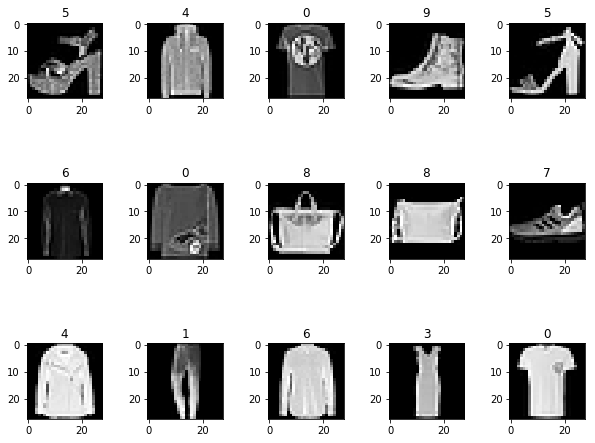

In [39]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.6, hspace=0.4)
# figure
x, y = 5, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(trainImages[i][:,:,0], interpolation='nearest', cmap='gray')
    plt.title(np.argwhere(trainLabels[i]>0)[0][0])   
plt.show()

### 3. Neural Network

#### 3.1  Define Activation Function 
The activation function for this Convolution Neural Network is choosen as 'softmax'. 
It is used because we have multiple classes in this network.

Relu is used as activation function for other hidden layers as it applies element-wise activation, leaving the layer volume same.
#### 3.2 Define the Model
The CNN is made of 5 layers, defined as follows:
> 1. Convolution layer of kernel size (3,3), with activation function 'relu'
> 2. Convolution layer of kernel size (3,3), with activation function 'relu'
> 3. Max Pooling layer to down sample the image representation. pool size of (2,2)
> 4. A fully connected Layer, with activation function 'relu'
> 5. Output Layer: A fully connected Layer, with activation function 'softmax'

Dropout is added to help introduce redundancy into the model. After trying different values, I have taken 0.25 as dropout value for the fully connected networks.


In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=kernel_size, activation='relu'))
# To reduce size
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(numClasses, activation='softmax'))

# Prev Results
# with dropout = 0.25, Test loss: 0.22625762795805932, Test accuracy: 0.9195


#### 3.3 Set the optimizer
Adam optimizer is used with learning rate 0.001, epsilon = 1e-08.
Adam is used because it converges fast and uses adaptive learning rate. It also overcomes the problems of slow convergence, vanishing learning rate and fluctuating loss function.

In [41]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Results with other optimizers
# RMSprop

#### 3.4 Fit the Training Data
Fitting the data on the model created, with the hyper-parameters defined earlier. 
Here, instead of creating a different set for validation, I have used the testing data set ot validate data.

In [42]:
history = model.fit(trainImages, trainLabels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(valImages, valLabels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 81s 1ms/step - loss: 0.5161 - acc: 0.8152 - val_loss: 0.3557 - val_acc: 0.8715
Epoch 2/8
54000/54000 [==============================] - 70s 1ms/step - loss: 0.3425 - acc: 0.8768 - val_loss: 0.3046 - val_acc: 0.8928
Epoch 3/8
54000/54000 [==============================] - 77s 1ms/step - loss: 0.3008 - acc: 0.8931 - val_loss: 0.3036 - val_acc: 0.8872
Epoch 4/8
54000/54000 [==============================] - 72s 1ms/step - loss: 0.2761 - acc: 0.9008 - val_loss: 0.2660 - val_acc: 0.9042
Epoch 5/8
54000/54000 [==============================] - 68s 1ms/step - loss: 0.2630 - acc: 0.9062 - val_loss: 0.2435 - val_acc: 0.9147
Epoch 6/8
54000/54000 [==============================] - 69s 1ms/step - loss: 0.2484 - acc: 0.9109 - val_loss: 0.2454 - val_acc: 0.9107
Epoch 7/8
54000/54000 [==============================] - 76s 1ms/step - loss: 0.2349 - acc: 0.9149 - val_loss: 0.2326 - val_acc: 0.9192

### 4. Evaluate Model

#### 4.1 Evaluate the metwork with test data

In [43]:
score = model.evaluate(testImages, testLabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23466501327157022
Test accuracy: 0.9154


#### 4.2 Plot Accuracy and Loss curves

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


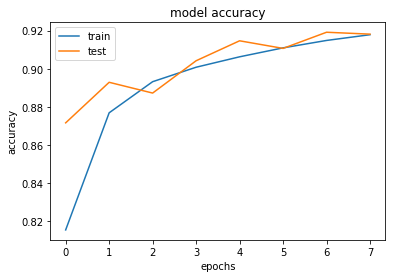

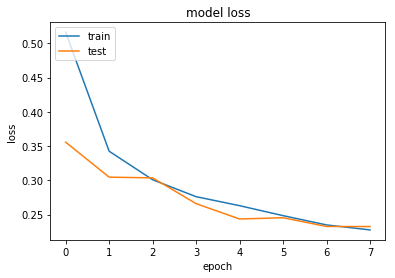

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dense_7 (Dense)              (None, 12, 12, 128)       8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 18432)             0         
__________

In [44]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.summary()